In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pyslabgrid import eqcatana as eqc

In [2]:
# catalogues
cat_folder = '../02midslab-config/projected_catalogs/'
original_catalog = 'NZeqcat_Rollins13042020-subd-slab-proj2midslab.csv'
declustered_catalog = 'Grue_NZeqcat_Rollins13042020SEPI-subd-slab-proj2midslab.csv'

In [3]:
def compute_yearlycounts(year, mag, minmag=0):
    set_year = [x for x in set(year.tolist())]
    years, cumcounts = [],[]
    for uyear in set_year:
        cumkount = sum((mag>=minmag)&(year==uyear))
        years.append(uyear)
        cumcounts.append(cumkount)
    return years, cumcounts 

In [4]:
eqcat = eqc.read_projectedslabcatalog(cat_folder+original_catalog, min_year=1900, min_mag=3.0)
slon = np.array(eqcat['slon'])
slat = np.array(eqcat['slat'])
mag = np.array(eqcat['mag'])
year = np.array(eqcat['year'])

# Hikurangi
slabzone = 'hik-whole'
in_hikw = eqc.get_inpolgyon((eqcat['slon'],eqcat['slat']), eqc.get_zonepolygon(slabzone))
mag_hikw = mag[in_hikw]
year_hikw = year[in_hikw]
years_hikM3, cumcounts_hikM3 = compute_yearlycounts(year_hikw, mag_hikw, minmag=3.0)
years_hikM4, cumcounts_hikM4 = compute_yearlycounts(year_hikw, mag_hikw, minmag=4.0)
years_hikM5, cumcounts_hikM5 = compute_yearlycounts(year_hikw, mag_hikw, minmag=5.0)

# puysegur
slabzone = 'puy-whole'
in_puyw = eqc.get_inpolgyon((eqcat['slon'],eqcat['slat']), eqc.get_zonepolygon(slabzone))
mag_puyw = mag[in_puyw]
year_puyw = year[in_puyw]
years_puyM3, cumcounts_puyM3 = compute_yearlycounts(year_puyw, mag_puyw, minmag=3.0)
years_puyM4, cumcounts_puyM4 = compute_yearlycounts(year_puyw, mag_puyw, minmag=4.0)
years_puyM5, cumcounts_puyM5 = compute_yearlycounts(year_puyw, mag_puyw, minmag=5.0)

#-------------------------------------

eqcat = eqc.read_projectedslabcatalog(cat_folder+declustered_catalog, min_year=1900, min_mag=3.0)
slon = np.array(eqcat['slon'])
slat = np.array(eqcat['slat'])
mag = np.array(eqcat['mag'])
year = np.array(eqcat['year'])

# Hikurangi
slabzone = 'hik-whole'
in_hikw = eqc.get_inpolgyon((eqcat['slon'],eqcat['slat']), eqc.get_zonepolygon(slabzone))
mag_hikw = mag[in_hikw]
year_hikw = year[in_hikw]
dyears_hikM3, dcumcounts_hikM3 = compute_yearlycounts(year_hikw, mag_hikw, minmag=3.0)
dyears_hikM4, dcumcounts_hikM4 = compute_yearlycounts(year_hikw, mag_hikw, minmag=4.0)
dyears_hikM5, dcumcounts_hikM5 = compute_yearlycounts(year_hikw, mag_hikw, minmag=5.0)

# puysegur
slabzone = 'puy-whole'
in_puyw = eqc.get_inpolgyon((eqcat['slon'],eqcat['slat']), eqc.get_zonepolygon(slabzone))
mag_puyw = mag[in_puyw]
year_puyw = year[in_puyw]
dyears_puyM3, dcumcounts_puyM3 = compute_yearlycounts(year_puyw, mag_puyw, minmag=3.0)
dyears_puyM4, dcumcounts_puyM4 = compute_yearlycounts(year_puyw, mag_puyw, minmag=4.0)
dyears_puyM5, dcumcounts_puyM5 = compute_yearlycounts(year_puyw, mag_puyw, minmag=5.0)


In [5]:
def plot_compare(years, cumcounts, dcumcounts, minmag,zonelab = 'Hikurangi',\
                 ymax=1000, xmin = 1920, ax = None):
    sumdiff = sum(cumcounts)-sum(dcumcounts)
    remperc = 100*sumdiff/sum(cumcounts)
    ax.plot(years, cumcounts, 'k-', label = 'original')
    ax.plot(years, dcumcounts, 'r-', label='declustered')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_ylim([0, ymax])
    ax.legend(loc='upper left', frameon=False)
    ax.set_xlim([xmin, 2020])
    ax.text(xmin+3, 0.55*ymax, str(round(remperc,1))+'% of events removed' )
    ax.set_title(zonelab + ' intraslab events ($Mw$$\geq$'+ str(minmag) + ')', fontsize=13)

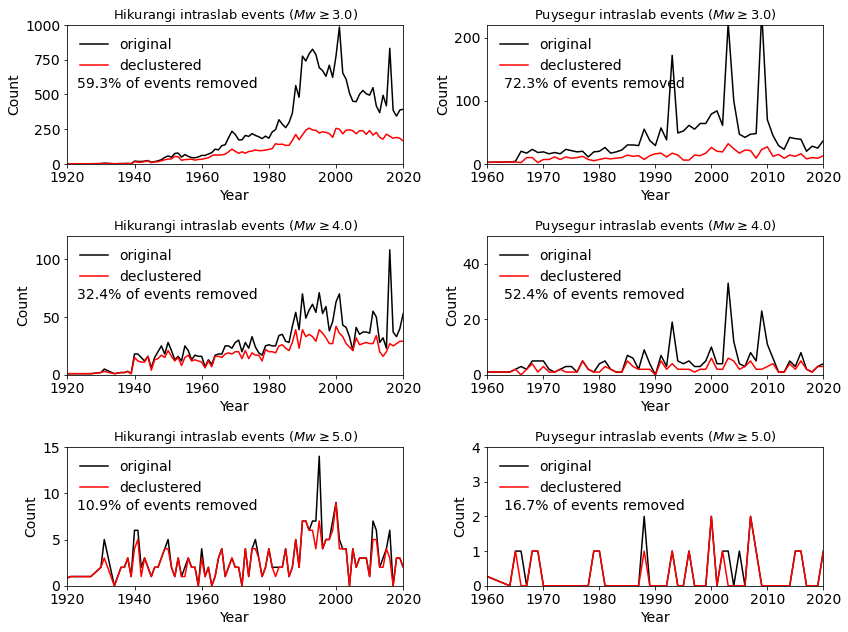

In [7]:
fig, ax = plt.subplots(3,2, figsize=(12,9))
plt.rcParams.update({'font.size': 14})

plot_compare(years_hikM3, cumcounts_hikM3, dcumcounts_hikM3, minmag=3.0, \
             zonelab = 'Hikurangi', ymax=1000, ax = ax[0,0])
plot_compare(years_hikM4, cumcounts_hikM4, dcumcounts_hikM4, minmag=4.0, \
             zonelab = 'Hikurangi', ymax=120, ax = ax[1,0])
plot_compare(years_hikM5, cumcounts_hikM5, dcumcounts_hikM5, minmag=5.0, \
             zonelab = 'Hikurangi', ymax=15, ax = ax[2,0])

plot_compare(years_puyM3, cumcounts_puyM3, dcumcounts_puyM3, minmag=3.0, \
             zonelab = 'Puysegur', ymax=220, xmin = 1960,  ax = ax[0,1])
plot_compare(years_puyM4, cumcounts_puyM4, dcumcounts_puyM4, minmag=4.0, \
             zonelab = 'Puysegur', ymax=50, xmin = 1960,  ax = ax[1,1])
plot_compare(years_puyM5, cumcounts_puyM5, dcumcounts_puyM5, minmag=5.0, \
             zonelab = 'Puysegur', ymax=4, xmin = 1960, ax = ax[2,1])
fig.tight_layout()
plt.savefig('Figure7.jpeg', dpi=300, facecolor='w')